In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, callbacks
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess

from sklearn.metrics import classification_report, confusion_matrix



# CARGA DEL DATASET + VISUALIZACIÓN

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


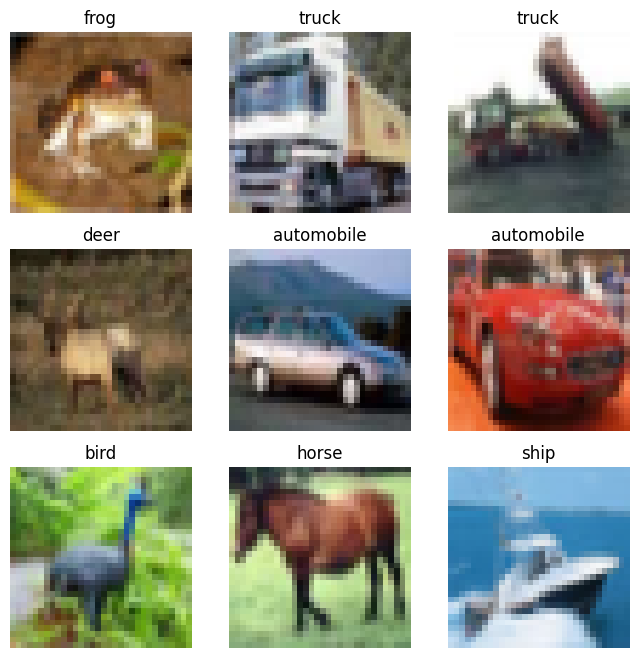

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


# PREPROCESING

In [12]:

# Normalización para CNN from scratch
X_train_norm = X_train.astype("float32") / 255.0
X_test_norm  = X_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)



In [23]:
def plot_history(history, model_name):
    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


# CNN FROM SCRATCH (VGG-LIKE)

In [4]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(), layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(), layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(), layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer=optimizers.Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 666,538 (2.54 MB)

 Trainable params: 666,538 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [ ]:
early_stop = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [5]:

history_cnn = cnn_model.fit(
    X_train_norm, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2459 - loss: 1.9918 - val_accuracy: 0.4686 - val_loss: 1.4350
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4677 - loss: 1.4503 - val_accuracy: 0.5702 - val_loss: 1.2027
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5525 - loss: 1.2523 - val_accuracy: 0.6378 - val_loss: 1.0370
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6104 - loss: 1.0973 - val_accuracy: 0.6742 - val_loss: 0.9337
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6460 - loss: 0.9985 - val_accuracy: 0.6980 - val_loss: 0.8721
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6713 - loss: 0.9340 - val_accuracy: 0.7113 - val_loss: 0.8318
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7017 - loss: 0.8630 - val_accuracy: 0.7349 - val_loss: 0.7692
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7090 - loss: 0.8308 - val_accuracy: 

In [8]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(
    X_test_norm, y_test_cat, verbose=0
)

print("CNN from Scratch - Test Accuracy:", test_acc_cnn)
print("CNN from Scratch - Test Loss:", test_loss_cnn)



CNN from Scratch - Test Accuracy: 0.8198000192642212
CNN from Scratch - Test Loss: 0.5420712828636169


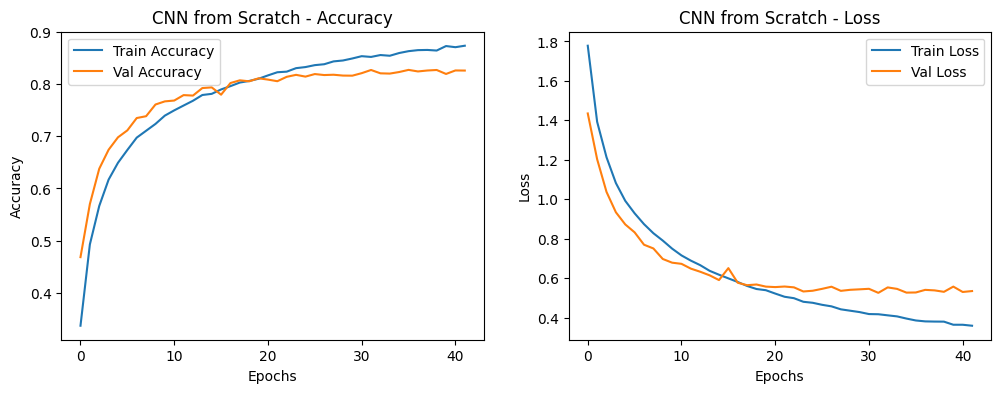

In [10]:
plot_history(history_cnn, "CNN from Scratch")


# RESNET



## Generador con preprocesamiento ResNet


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

resnet_datagen = ImageDataGenerator(
    preprocessing_function=resnet_preprocess,
    validation_split=0.2
)


## Generadores de entrenamiento y validación

In [13]:
train_resnet_gen = resnet_datagen.flow(
    X_train, y_train_cat,
    batch_size=32,
    subset='training'
)

val_resnet_gen = resnet_datagen.flow(
    X_train, y_train_cat,
    batch_size=32,
    subset='validation'
)


## ResNet50



In [18]:
base_resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_resnet.trainable = False

resnet_model = models.Sequential([
    layers.Resizing(224, 224),
    base_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

resnet_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [36]:
history_resnet = resnet_model.fit(
    train_resnet_gen,
    epochs=50,
    validation_data=val_resnet_gen,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9635 - loss: 0.1075 - val_accuracy: 0.9211 - val_loss: 0.2387
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9666 - loss: 0.0990 - val_accuracy: 0.9206 - val_loss: 0.2424
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9696 - loss: 0.0902 - val_accuracy: 0.9212 - val_loss: 0.2425
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9704 - loss: 0.0849 - val_accuracy: 0.9223 - val_loss: 0.2398
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9725 - loss: 0.0830 - val_accuracy: 0.9235 - val_loss: 0.2413
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9744 - loss: 0.0771 - val_accuracy: 0.9222 - val_loss: 0.2458
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9776 - loss: 0.0689 - val_accuracy: 0.9223 - val_loss: 0.2419
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9786 -

In [27]:
# Evaluación en el conjunto de test
test_loss_resnet, test_acc_resnet = resnet_model.evaluate(
    val_resnet_gen, verbose=0
)

print("ResNet50 - Test Accuracy:", test_acc_resnet)
print("ResNet50 - Test Loss:", test_loss_resnet)


ResNet50 - Test Accuracy: 0.921999990940094
ResNet50 - Test Loss: 0.23604127764701843


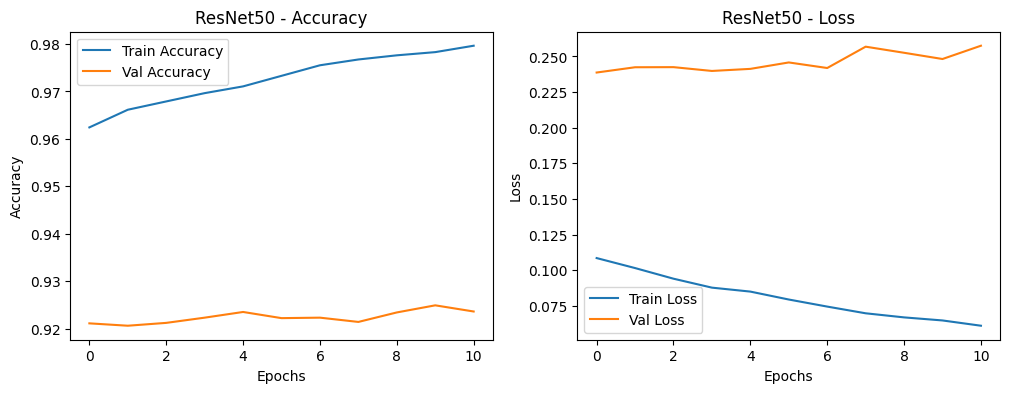

In [44]:
plot_history(history_resnet, "ResNet50")


# TRANSFER LEARNING – INCEPTIONV3

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

inception_datagen = ImageDataGenerator(
    preprocessing_function=inception_preprocess,
    validation_split=0.2
)


In [33]:
train_inc_gen = inception_datagen.flow(
    X_train, y_train_cat,
    batch_size=16,   # 👈 batch más pequeño (importante)
    subset='training'
)

val_inc_gen = inception_datagen.flow(
    X_train, y_train_cat,
    batch_size=16,
    subset='validation'
)


In [34]:
base_inception = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(299,299,3)
)

base_inception.trainable = False

inception_model = models.Sequential([
    layers.Resizing(299, 299),   # 👈 CLAVE
    base_inception,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

inception_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

inception_model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [35]:
history_inception = inception_model.fit(
    train_inc_gen,
    epochs=30,
    validation_data=val_inc_gen,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 59s 17ms/step - accuracy: 0.6866 - loss: 0.9735 - val_accuracy: 0.8602 - val_loss: 0.4172
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8477 - loss: 0.4620 - val_accuracy: 0.8722 - val_loss: 0.3841
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8595 - loss: 0.4168 - val_accuracy: 0.8787 - val_loss: 0.3594
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8691 - loss: 0.3893 - val_accuracy: 0.8763 - val_loss: 0.3606
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8815 - loss: 0.3591 - val_accuracy: 0.8787 - val_loss: 0.3478
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8880 - loss: 0.3393 - val_accuracy: 0.8825 - val_loss: 0.3368
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8887 - loss: 0.3238 - val_accuracy: 0.8854 - val_loss: 0.3368
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.8959 -

In [38]:
test_loss_inc, test_acc_inc = inception_model.evaluate(
    val_inc_gen, verbose=0
)

print("InceptionV3 Fine-Tuned - Test Accuracy:", test_acc_inc)
print("InceptionV3 Fine-Tuned - Test Loss:", test_loss_inc)


InceptionV3 Fine-Tuned - Test Accuracy: 0.8952000141143799
InceptionV3 Fine-Tuned - Test Loss: 0.31372562050819397


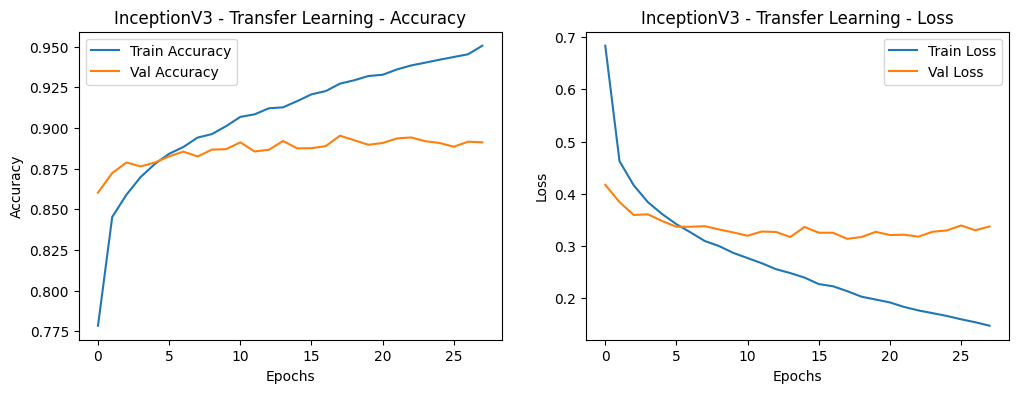

In [39]:
plot_history(history_inception, "InceptionV3 - Transfer Learning")


## FINE-TUNING

### unfreeze fine tunning


In [41]:
# Descongelar el backbone
base_inception.trainable = True

# Congelar todas menos las últimas 30 capas
for layer in base_inception.layers[:-30]:
    layer.trainable = False


In [42]:
inception_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),  # 👈 LR MUY BAJO
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [43]:
history_inception_ft = inception_model.fit(
    train_inc_gen,
    epochs=15,
    validation_data=val_inc_gen,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - accuracy: 0.8865 - loss: 0.3260 - val_accuracy: 0.8992 - val_loss: 0.2966
Epoch 2/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9211 - loss: 0.2278 - val_accuracy: 0.9019 - val_loss: 0.2876
Epoch 3/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9353 - loss: 0.1884 - val_accuracy: 0.9044 - val_loss: 0.2851
Epoch 4/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9466 - loss: 0.1562 - val_accuracy: 0.9036 - val_loss: 0.2886
Epoch 5/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9562 - loss: 0.1333 - val_accuracy: 0.9074 - val_loss: 0.2864
Epoch 6/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9639 - loss: 0.1111 - val_accuracy: 0.9090 - val_loss: 0.2885
Epoch 7/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9699 - loss: 0.0906 - val_accuracy: 0.9072 - val_loss: 0.2963
Epoch 8/15
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9769 -

In [45]:
test_loss_inc, test_acc_inc = inception_model.evaluate(
    val_inc_gen, verbose=0
)

print("InceptionV3 Fine-Tuned - Test Accuracy:", test_acc_inc)
print("InceptionV3 Fine-Tuned - Test Loss:", test_loss_inc)

InceptionV3 Fine-Tuned - Test Accuracy: 0.9043999910354614
InceptionV3 Fine-Tuned - Test Loss: 0.2850789725780487


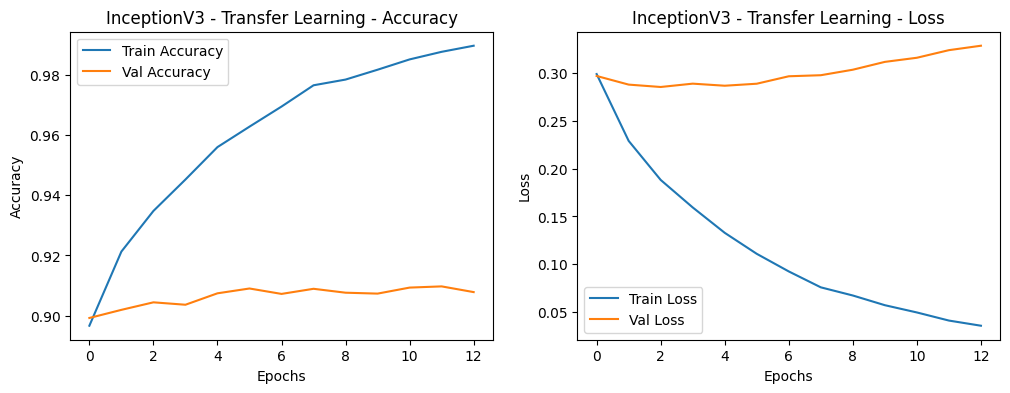

In [46]:
plot_history(history_inception_ft, "InceptionV3 - Transfer Learning")